In [94]:
import warnings
warnings.filterwarnings(action='ignore')

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
pd.set_option('display.max_rows', 50)

### 그래프 한글 깨짐 설정

In [97]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# matplotlib 에서 폰트 시용 설정
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [98]:
ls

'201211_서울특별시 자치구별 평균소득.xlsx'
'서울 구별 반려동물 수.csv'
'기간별 반려동물 수.jpg'
'기간별 유기동물보호현황.jpg'
'자치구-기간별 유기동물보호현황.jpg'
'자치구별 반려동물 수, 유기동물보호현황.jpg'
'자치구별 반려동물 수.jpg'
'자치구별 평균소득, 유기동물보호현황.jpg'
'자치구별 유기동물보호현황.jpg'
 sample_data/
'서울 유기 동물 수.xls'
'서울 반려동물 수.xls'
'서울시 구별 인구.xls'


In [99]:
df_pets = pd.read_csv('서울 구별 반려동물 수.csv')
df_pets

,Unnamed: 0,기간,대분류,분류,반려동물 여부,반려동물 여부.1,반려동물 취득경로,반려동물 취득경로.1,반려동물 취득경로.2,반려동물 취득경로.3,반려동물 취득경로.4,반려동물 취득경로.5,반려동물 취득경로.6
0,6,2014,강남구,강남구,27.4,72.6,94.9,10.1,3.5,0.4,1.6,0.4,-
1,7,2014,강동구,강동구,28.2,71.8,98.8,3.3,0.4,-,0.4,-,-
2,8,2014,강북구,강북구,18.8,81.3,87.9,9.2,7.1,-,0.7,1.4,-
3,9,2014,강서구,강서구,10.8,89.2,29.8,26,37.5,4.8,4.8,2.9,-
4,10,2014,관악구,관악구,11.5,88.5,41.2,21.9,32.5,1.8,3.5,1.8,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,400,2020,용산구,용산구,21.7,78.3,16.8,14.7,40.5,1.8,21.4,4.9,-
171,401,2020,은평구,은평구,18.5,81.5,22.9,19.1,40.6,3.6,9.7,4.1,-
172,405,2020,종로구,종로구,18.7,81.3,15.3,15.5,44.5,7.2,17.5,-,-
173,410,2020,중구,중구,19.1,80.9,15,26.8,42.7,4.2,8.2,3.1,-


In [100]:
df_populations = pd.read_excel('서울시 구별 인구.xls')
df_populations

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,인구밀도,인구밀도.1,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,인구밀도,인구밀도,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,인구밀도(명/㎢),면적(㎢),세대당인구,65세이상고령자
2,1991,합계,3330317,10904527,5485353,5419174,…,…,…,…,…,…,18014,605.33,3.27,…
3,1991,종로구,78169,236806,119127,117679,…,…,…,…,…,…,9865,24.01,3.03,…
4,1991,중구,61495,184142,93312,90830,…,…,…,…,…,…,18438,9.99,2.99,…
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,2020,관악구,274811,509803,255211,254592,495060,248339,246721,14743,6872,7871,-,-,1.8,78875
766,2020,서초구,173502,429025,205282,223743,425126,203359,221767,3899,1923,1976,-,-,2.45,60169
767,2020,강남구,234872,544055,260378,283677,539231,257999,281232,4824,2379,2445,-,-,2.3,75096
768,2020,송파구,281959,673926,325080,348846,667960,322299,345661,5966,2781,3185,-,-,2.37,93483


In [101]:
df_abandoned = pd.read_excel('서울 유기 동물 수.xls')
df_abandoned

,기간,자치구,유기동물보호현황,유기동물보호현황.1,유기동물보호현황.2,유기동물보호현황.3,유기동물보호현황.4,유기동물보호현황.5,유기동물보호현황.6,유기동물보호현황.7,유기동물보호현황.8,유기동물보호현황.9,유기동물보호현황.10,유기동물보호현황.11,유기동물보호현황.12,유기동물보호현황.13,유기동물보호현황.14,유기동물보호현황.15
0,기간,자치구,합계,개,개,개,개,개,고양이,고양이,고양이,고양이,고양이,기타,기타,기타,기타,기타
1,기간,자치구,합계,계,인도(주인),입양분양,폐사안락사,계류기증,계,인도(주인),입양분양,폐사안락사,계류기증,계,인도(주인),입양분양,폐사안락사,계류기증
2,2003,합계,7389,5085,143,644,2401,1897,2292,20,150,1609,513,12,0,5,2,5
3,2003,종로구,153,107,1,29,24,53,46,0,1,30,15,0,0,0,0,0
4,2003,중구,187,103,1,5,52,45,84,0,3,56,25,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2020,관악구,693,301,149,138,9,5,359,5,284,67,3,33,2,29,2,-
466,2020,서초구,163,94,27,20,44,3,54,-,4,42,8,15,-,12,3,-
467,2020,강남구,254,136,50,56,23,7,109,5,18,76,10,9,2,6,1,-
468,2020,송파구,258,140,64,35,31,10,110,-,19,90,1,8,1,6,1,-


In [102]:
df_pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   175 non-null    int64 
 1   기간           175 non-null    int64 
 2   대분류          175 non-null    object
 3   분류           175 non-null    object
 4   반려동물 여부      175 non-null    object
 5   반려동물 여부.1    175 non-null    object
 6   반려동물 취득경로    175 non-null    object
 7   반려동물 취득경로.1  175 non-null    object
 8   반려동물 취득경로.2  175 non-null    object
 9   반려동물 취득경로.3  175 non-null    object
 10  반려동물 취득경로.4  175 non-null    object
 11  반려동물 취득경로.5  175 non-null    object
 12  반려동물 취득경로.6  175 non-null    object
dtypes: int64(2), object(11)
memory usage: 17.9+ KB


In [103]:
df_populations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        770 non-null    object
 1   자치구       770 non-null    object
 2   세대        770 non-null    object
 3   인구        770 non-null    object
 4   인구.1      770 non-null    object
 5   인구.2      770 non-null    object
 6   인구.3      770 non-null    object
 7   인구.4      770 non-null    object
 8   인구.5      770 non-null    object
 9   인구.6      770 non-null    object
 10  인구.7      770 non-null    object
 11  인구.8      770 non-null    object
 12  인구밀도      770 non-null    object
 13  인구밀도.1    770 non-null    object
 14  세대당인구     770 non-null    object
 15  65세이상고령자  770 non-null    object
dtypes: object(16)
memory usage: 96.4+ KB


In [104]:
df_abandoned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기간           470 non-null    object
 1   자치구          470 non-null    object
 2   유기동물보호현황     470 non-null    object
 3   유기동물보호현황.1   470 non-null    object
 4   유기동물보호현황.2   470 non-null    object
 5   유기동물보호현황.3   470 non-null    object
 6   유기동물보호현황.4   470 non-null    object
 7   유기동물보호현황.5   470 non-null    object
 8   유기동물보호현황.6   470 non-null    object
 9   유기동물보호현황.7   470 non-null    object
 10  유기동물보호현황.8   470 non-null    object
 11  유기동물보호현황.9   470 non-null    object
 12  유기동물보호현황.10  470 non-null    object
 13  유기동물보호현황.11  470 non-null    object
 14  유기동물보호현황.12  470 non-null    object
 15  유기동물보호현황.13  470 non-null    object
 16  유기동물보호현황.14  470 non-null    object
 17  유기동물보호현황.15  470 non-null    object
dtypes: object(18)
memory usage: 66.2+ KB


### 필요한 columns만 남기기

In [105]:
df_pets = df_pets[['기간', '분류', '반려동물 여부']]

In [106]:
df_populations = df_populations[['기간', '자치구', '인구']]

In [107]:
df_abandoned = df_abandoned[['기간', '자치구', '유기동물보호현황']]

### 2014년 이후 데이터만 남기기

In [108]:
# df_pets는 2014년부터 데이터이므로 pass
df_pets

,기간,분류,반려동물 여부
0,2014,강남구,27.4
1,2014,강동구,28.2
2,2014,강북구,18.8
3,2014,강서구,10.8
4,2014,관악구,11.5
...,...,...,...
170,2020,용산구,21.7
171,2020,은평구,18.5
172,2020,종로구,18.7
173,2020,중구,19.1


In [109]:
# 0, 1번 인덱스 컬럼 정보 제거
df_populations.drop([0, 1], inplace=True)
df_populations

,기간,자치구,인구
2,1991,합계,10904527
3,1991,종로구,236806
4,1991,중구,184142
5,1991,용산구,294341
6,1991,성동구,789014
...,...,...,...
765,2020,관악구,509803
766,2020,서초구,429025
767,2020,강남구,544055
768,2020,송파구,673926


In [110]:
# 2014년 이후 데이터만 남기기
df_populations = df_populations.loc[df_populations['기간'].astype(int) >= 2014]

In [111]:
df_populations

,기간,자치구,인구
588,2014,합계,10369593
589,2014,종로구,165344
590,2014,중구,136227
591,2014,용산구,249914
592,2014,성동구,303891
...,...,...,...
765,2020,관악구,509803
766,2020,서초구,429025
767,2020,강남구,544055
768,2020,송파구,673926


In [112]:
# 자치구 합계 제거
df_populations = df_populations.loc[df_populations['자치구'] != '합계']

In [113]:
df_populations

,기간,자치구,인구
589,2014,종로구,165344
590,2014,중구,136227
591,2014,용산구,249914
592,2014,성동구,303891
593,2014,광진구,377375
...,...,...,...
765,2020,관악구,509803
766,2020,서초구,429025
767,2020,강남구,544055
768,2020,송파구,673926


In [114]:
# 0, 1번 인덱스 컬럼 정보 제거
df_abandoned.drop([0, 1], inplace=True)
df_abandoned

,기간,자치구,유기동물보호현황
2,2003,합계,7389
3,2003,종로구,153
4,2003,중구,187
5,2003,용산구,233
6,2003,성동구,127
...,...,...,...
465,2020,관악구,693
466,2020,서초구,163
467,2020,강남구,254
468,2020,송파구,258


In [115]:
# 자치구 합계 제거
df_abandoned = df_abandoned.loc[df_abandoned['자치구'] != '합계']

In [116]:
# 2014년 이후 데이터만 남기기
df_abandoned = df_abandoned.loc[df_abandoned['기간'].astype(int) >= 2014]

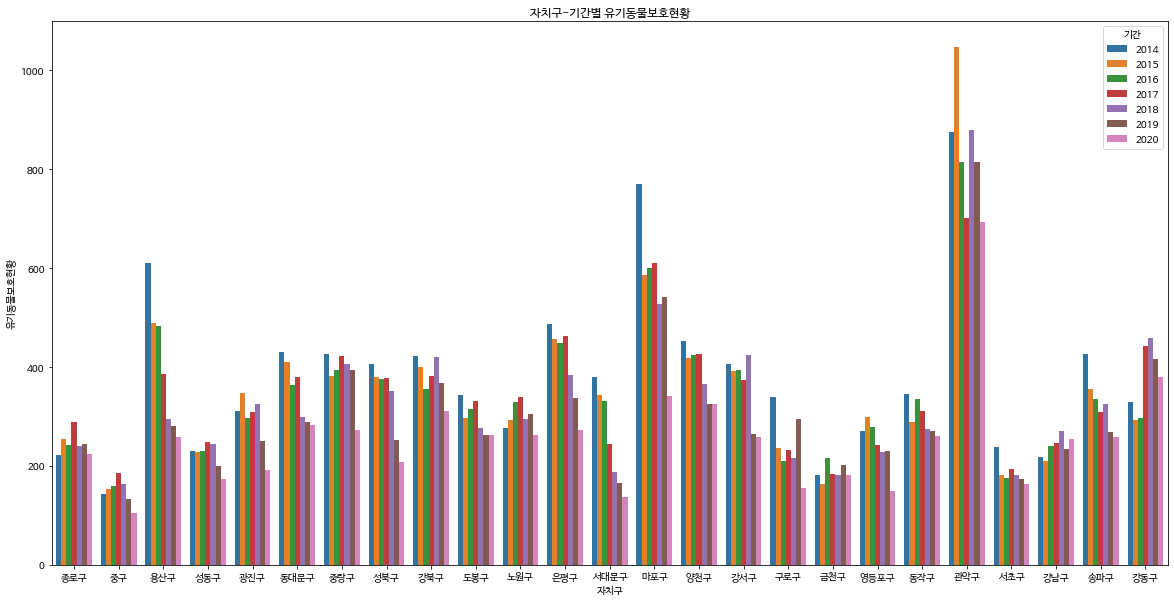

In [117]:
fig = plt.figure(figsize=(20, 10))
sns.barplot(data = df_abandoned, x = '자치구', y = '유기동물보호현황', hue = '기간')
plt.title('[자치구-기간별 유기동물보호현황]', fontsize= 25, fontweight='bold', pad=20)
plt.savefig('자치구-기간별 유기동물보호현황.jpg')
plt.show()

### 서울시 반려동물 수

In [118]:
df_pets

,기간,분류,반려동물 여부
0,2014,강남구,27.4
1,2014,강동구,28.2
2,2014,강북구,18.8
3,2014,강서구,10.8
4,2014,관악구,11.5
...,...,...,...
170,2020,용산구,21.7
171,2020,은평구,18.5
172,2020,종로구,18.7
173,2020,중구,19.1


In [119]:
df_populations

,기간,자치구,인구
589,2014,종로구,165344
590,2014,중구,136227
591,2014,용산구,249914
592,2014,성동구,303891
593,2014,광진구,377375
...,...,...,...
765,2020,관악구,509803
766,2020,서초구,429025
767,2020,강남구,544055
768,2020,송파구,673926


### merge를 위한 컬럼 만들기

In [120]:
df_pets['Key'] = df_pets['기간'].astype(str) + df_pets['분류']
df_pets

,기간,분류,반려동물 여부,Key
0,2014,강남구,27.4,2014강남구
1,2014,강동구,28.2,2014강동구
2,2014,강북구,18.8,2014강북구
3,2014,강서구,10.8,2014강서구
4,2014,관악구,11.5,2014관악구
...,...,...,...,...
170,2020,용산구,21.7,2020용산구
171,2020,은평구,18.5,2020은평구
172,2020,종로구,18.7,2020종로구
173,2020,중구,19.1,2020중구


In [121]:
df_populations['Key'] = df_populations['기간'].astype(str) + df_populations['자치구']
df_populations

,기간,자치구,인구,Key
589,2014,종로구,165344,2014종로구
590,2014,중구,136227,2014중구
591,2014,용산구,249914,2014용산구
592,2014,성동구,303891,2014성동구
593,2014,광진구,377375,2014광진구
...,...,...,...,...
765,2020,관악구,509803,2020관악구
766,2020,서초구,429025,2020서초구
767,2020,강남구,544055,2020강남구
768,2020,송파구,673926,2020송파구


In [122]:
df_merge = pd.merge(df_populations, df_pets, on='Key')
df_merge

,기간_x,자치구,인구,Key,기간_y,분류,반려동물 여부
0,2014,종로구,165344,2014종로구,2014,종로구,22.2
1,2014,중구,136227,2014중구,2014,중구,13.6
2,2014,용산구,249914,2014용산구,2014,용산구,19.3
3,2014,성동구,303891,2014성동구,2014,성동구,22.9
4,2014,광진구,377375,2014광진구,2014,광진구,10.6
...,...,...,...,...,...,...,...
170,2020,관악구,509803,2020관악구,2020,관악구,16.6
171,2020,서초구,429025,2020서초구,2020,서초구,21.6
172,2020,강남구,544055,2020강남구,2020,강남구,21.4
173,2020,송파구,673926,2020송파구,2020,송파구,21.6


In [123]:
df_merge.drop(columns=['Key', '기간_y', '분류'], inplace=True)
df_merge

,기간_x,자치구,인구,반려동물 여부
0,2014,종로구,165344,22.2
1,2014,중구,136227,13.6
2,2014,용산구,249914,19.3
3,2014,성동구,303891,22.9
4,2014,광진구,377375,10.6
...,...,...,...,...
170,2020,관악구,509803,16.6
171,2020,서초구,429025,21.6
172,2020,강남구,544055,21.4
173,2020,송파구,673926,21.6


In [124]:
df_merge.rename(columns={'기간_x':'기간'}, inplace=True)
df_merge

,기간,자치구,인구,반려동물 여부
0,2014,종로구,165344,22.2
1,2014,중구,136227,13.6
2,2014,용산구,249914,19.3
3,2014,성동구,303891,22.9
4,2014,광진구,377375,10.6
...,...,...,...,...
170,2020,관악구,509803,16.6
171,2020,서초구,429025,21.6
172,2020,강남구,544055,21.4
173,2020,송파구,673926,21.6


In [125]:
df_merge = df_merge.loc[df_merge['기간'] != '2015']

In [126]:
df_merge = df_merge.loc[df_merge['기간'] != '2018']

In [127]:
df_merge

,기간,자치구,인구,반려동물 여부
0,2014,종로구,165344,22.2
1,2014,중구,136227,13.6
2,2014,용산구,249914,19.3
3,2014,성동구,303891,22.9
4,2014,광진구,377375,10.6
...,...,...,...,...
170,2020,관악구,509803,16.6
171,2020,서초구,429025,21.6
172,2020,강남구,544055,21.4
173,2020,송파구,673926,21.6


In [128]:
df_merge['반려동물 수'] = (df_merge['인구'].astype(int) * df_merge['반려동물 여부'].astype(float))/100

In [129]:
df_merge

,기간,자치구,인구,반려동물 여부,반려동물 수
0,2014,종로구,165344,22.2,36706.368
1,2014,중구,136227,13.6,18526.872
2,2014,용산구,249914,19.3,48233.402
3,2014,성동구,303891,22.9,69591.039
4,2014,광진구,377375,10.6,40001.750
...,...,...,...,...,...
170,2020,관악구,509803,16.6,84627.298
171,2020,서초구,429025,21.6,92669.400
172,2020,강남구,544055,21.4,116427.770
173,2020,송파구,673926,21.6,145568.016


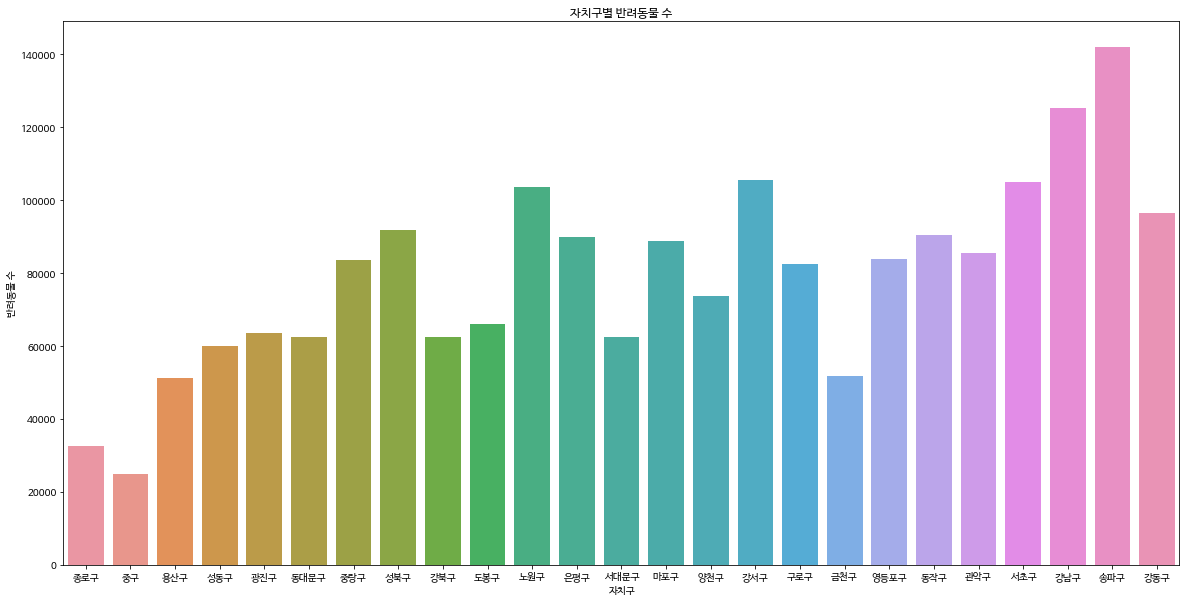

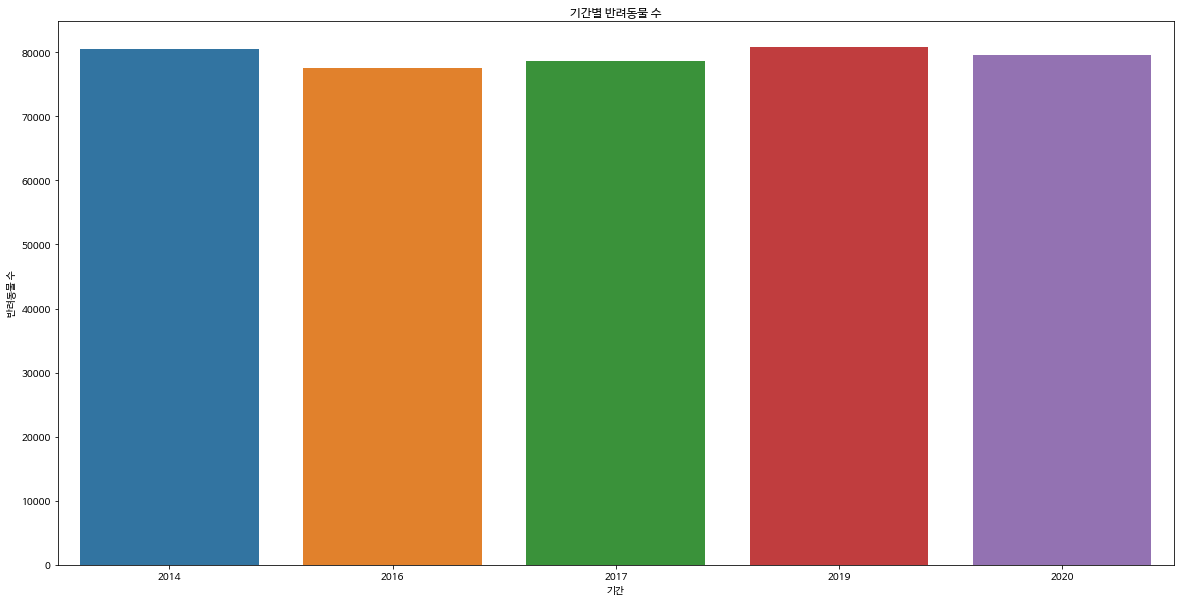

In [130]:
fig = plt.figure(figsize=(20, 10))
sns.barplot(data = df_merge, x = '자치구', y = '반려동물 수', ci=None)
plt.title('[자치구별 반려동물 수]', fontsize= 25, fontweight='bold', pad=20)
plt.savefig('자치구별 반려동물 수.jpg')
plt.show()
fig = plt.figure(figsize=(20, 10))
sns.barplot(data = df_merge, x = '기간', y = '반려동물 수', ci=None)
plt.title('[기간별 반려동물 수]', fontsize= 25, fontweight='bold', pad=20)
plt.savefig('기간별 반려동물 수.jpg')
plt.show()

In [131]:
df_abandoned

,기간,자치구,유기동물보호현황
289,2014,종로구,223
290,2014,중구,144
291,2014,용산구,611
292,2014,성동구,231
293,2014,광진구,312
...,...,...,...
465,2020,관악구,693
466,2020,서초구,163
467,2020,강남구,254
468,2020,송파구,258


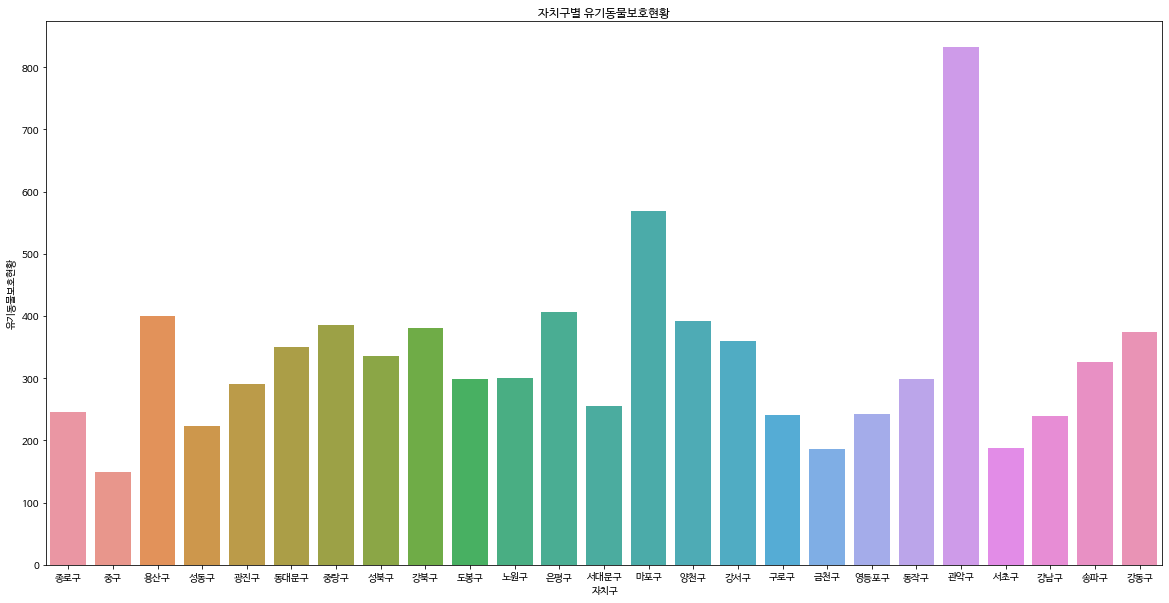

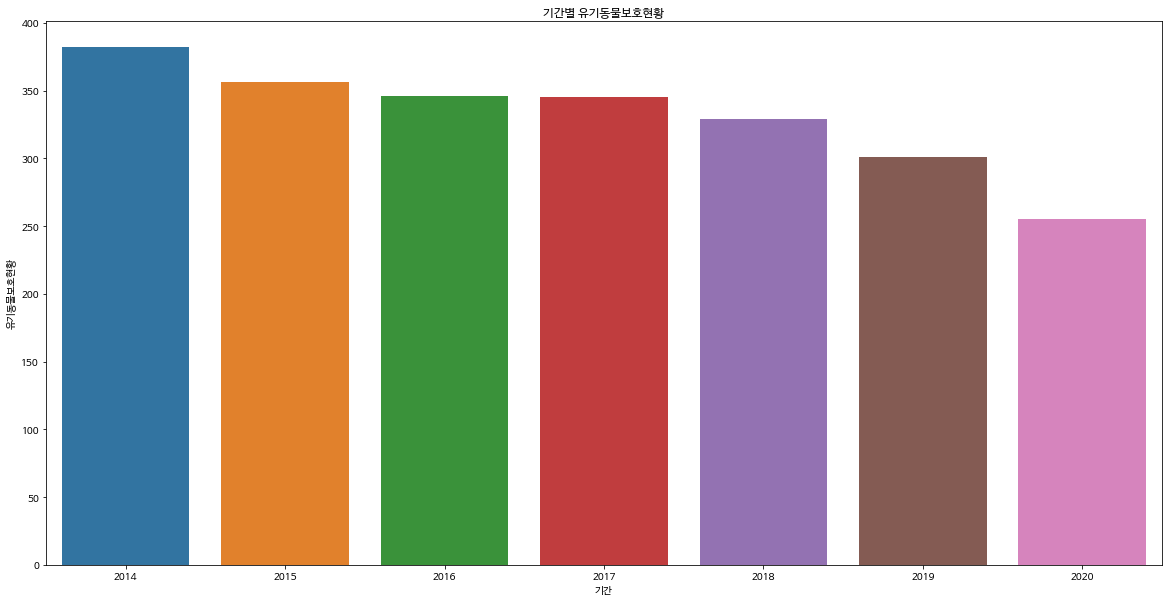

In [132]:
fig = plt.figure(figsize=(20, 10))
sns.barplot(data=df_abandoned, x='자치구', y='유기동물보호현황', ci=None)
plt.title('[자치구별 유기동물보호현황]', fontsize= 25, fontweight='bold', pad=20)
plt.savefig('자치구별 유기동물보호현황.jpg')
plt.show()
fig = plt.figure(figsize=(20, 10))
sns.barplot(data=df_abandoned, x='기간', y='유기동물보호현황', ci=None)
plt.title('[기간별 유기동물보호현황]', fontsize= 25, fontweight='bold', pad=20)
plt.savefig('기간별 유기동물보호현황.jpg')
plt.show()

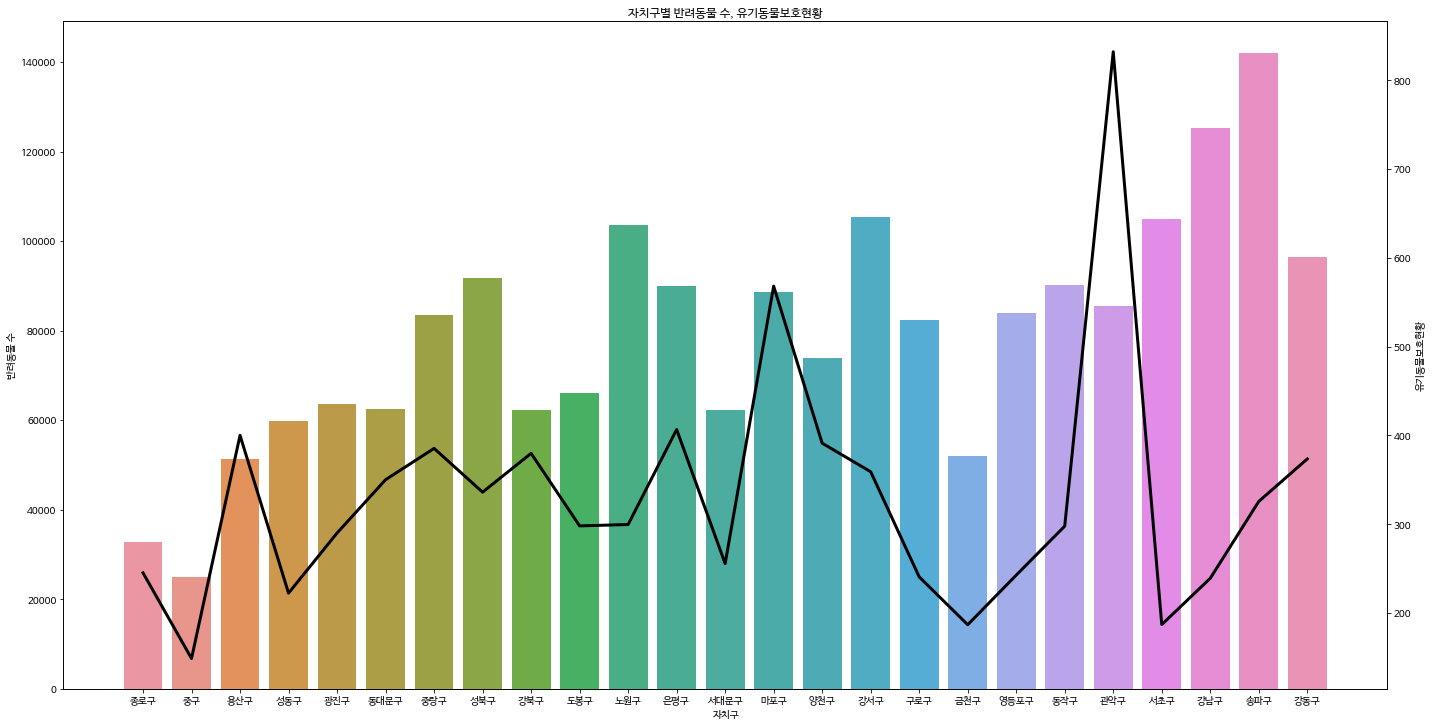

In [133]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


sns.barplot(data = df_merge, x = '자치구', y = '반려동물 수', ci=None, ax=ax1)

sns.lineplot(data=df_abandoned, x='자치구', y='유기동물보호현황', ci=None, ax=ax2, color='black', lw=3)
fig.tight_layout()
plt.title('[자치구별 반려동물 수, 유기동물보호현황]', fontsize= 25, fontweight='bold', pad=20)
plt.savefig('자치구별 반려동물 수, 유기동물보호현황.jpg')
plt.show()

In [134]:
df_income = pd.read_excel('201211_서울특별시 자치구별 평균소득.xlsx')

In [135]:
df_income

,서울특별시,자치구,평균소득
0,NaN,강남구,7888.155
1,NaN,강동구,5567.630
2,NaN,강북구,3552.028
3,NaN,강서구,4254.860
4,NaN,관악구,4300.649
5,NaN,광진구,4980.521
6,NaN,구로구,4317.446
7,NaN,금천구,4253.206
8,NaN,노원구,4538.118
9,NaN,도봉구,4253.481


In [136]:
df_abandoned.loc[df_abandoned['자치구'] == '강남구'].sum()

기간          2014201520162017201820192020
자치구                강남구강남구강남구강남구강남구강남구강남구
유기동물보호현황                            1674
dtype: object

In [140]:
df_abandoned

,기간,자치구,유기동물보호현황
289,2014,종로구,223
290,2014,중구,144
291,2014,용산구,611
292,2014,성동구,231
293,2014,광진구,312
...,...,...,...
465,2020,관악구,693
466,2020,서초구,163
467,2020,강남구,254
468,2020,송파구,258


In [139]:
df_abandoned.groupby(by='자치구')['유기동물보호현황'].sum()

자치구
강남구     1674
강동구     2615
강북구     2659
강서구     2514
관악구     5825
광진구     2031
구로구     1685
금천구     1308
노원구     2098
도봉구     2087
동대문구    2451
동작구     2085
마포구     3977
서대문구    1790
서초구     1309
성동구     1557
성북구     2353
송파구     2280
양천구     2739
영등포구    1699
용산구     2801
은평구     2847
종로구     1717
중구      1042
중랑구     2698
Name: 유기동물보호현황, dtype: int64

In [143]:
df_income['유기동물보호현황'] = np.array(df_sum.sort_values('자치구')['유기동물보호현황'])

In [144]:
df_income

,서울특별시,자치구,평균소득,유기동물보호현황
0,NaN,강남구,7888.155,1674
1,NaN,강동구,5567.630,2615
2,NaN,강북구,3552.028,2659
3,NaN,강서구,4254.860,2514
4,NaN,관악구,4300.649,5825
5,NaN,광진구,4980.521,2031
6,NaN,구로구,4317.446,1685
7,NaN,금천구,4253.206,1308
8,NaN,노원구,4538.118,2098
9,NaN,도봉구,4253.481,2087


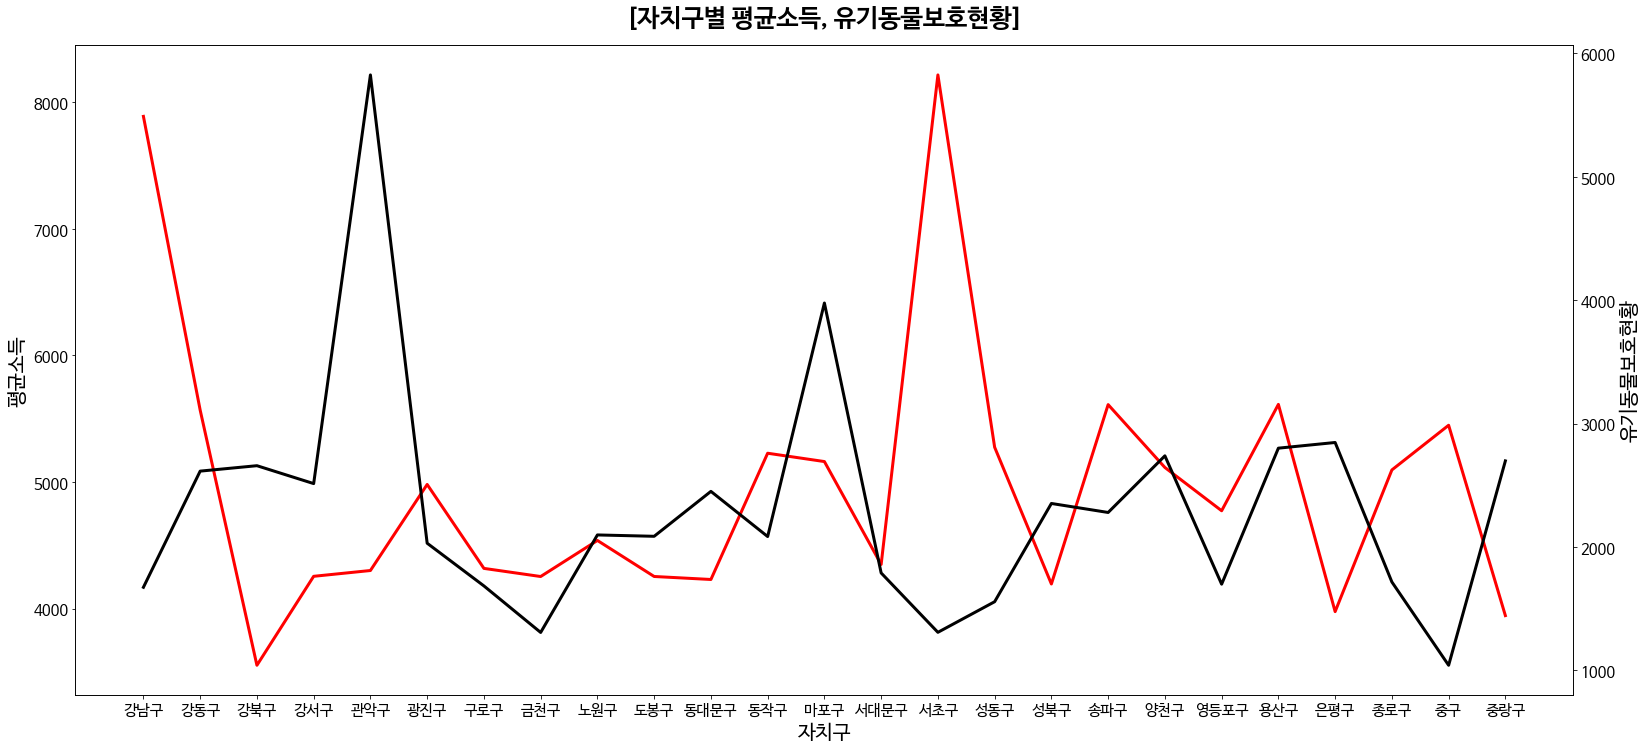

In [160]:
plt.rcParams['figure.figsize'] = (23, 10)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기

sns.lineplot(data = df_income, x='자치구', y = '평균소득', ci=None, ax=ax1, color='red', lw=3)

sns.lineplot(data=df_income, x='자치구', y='유기동물보호현황', ci=None, ax=ax2, color='black', lw=3)
fig.tight_layout()
plt.title('[자치구별 평균소득, 유기동물보호현황]', fontsize= 25, fontweight='bold', pad=20)
plt.savefig('자치구별 평균소득, 유기동물보호현황.jpg')
plt.show()